In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
path = r"C:\Users\User\Desktop\Akshay project\Data set\Telecom_customer_churn.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape  # this shows 21 columns and 7043 rows in dataset

(7043, 21)

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#No Null values
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Removing customer IDs from the data set since it is not used for our model
data = data.drop("customerID", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Number of churn

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


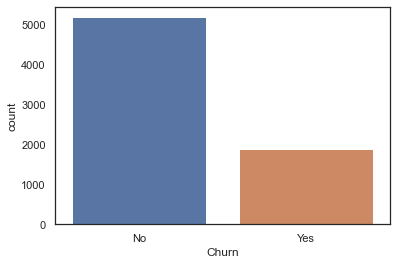

In [8]:
sns.set(style="white", palette="deep", color_codes=True)
sns.despine(left=True)
sns.countplot(data["Churn"]);

In [11]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
data.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [13]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
#Converting total charges object type into numeric
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
#Converting churn column into numerical
data.dropna(inplace = True)

data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

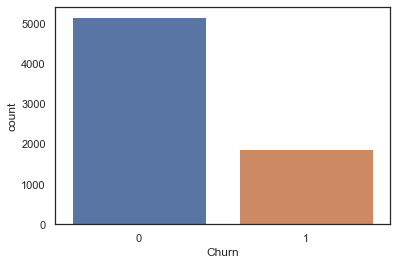

In [17]:
sns.countplot(data['Churn'])

<AxesSubplot:xlabel='gender', ylabel='count'>

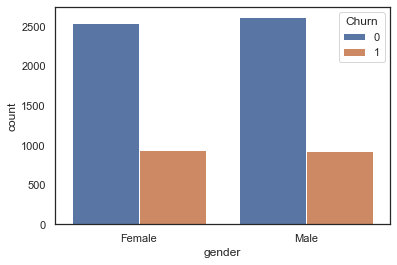

In [18]:
#churn data for both males and females
sns.countplot(x='gender' , hue = 'Churn' , data=data)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

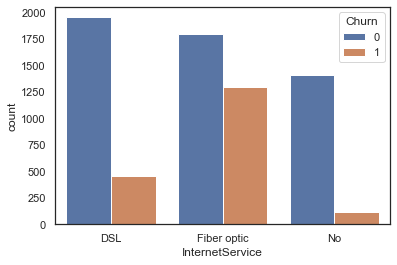

In [19]:
sns.countplot(x='InternetService' , hue = 'Churn' , data=data)

In [21]:
#We have to convert all the strings to  numeric :

from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column]) 

<ipython-input-21-f88629210663>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:


In [22]:
data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
#Now we see all the data in numerical

In [23]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [24]:
X = data.drop(columns=['Churn'])
y = data['Churn']

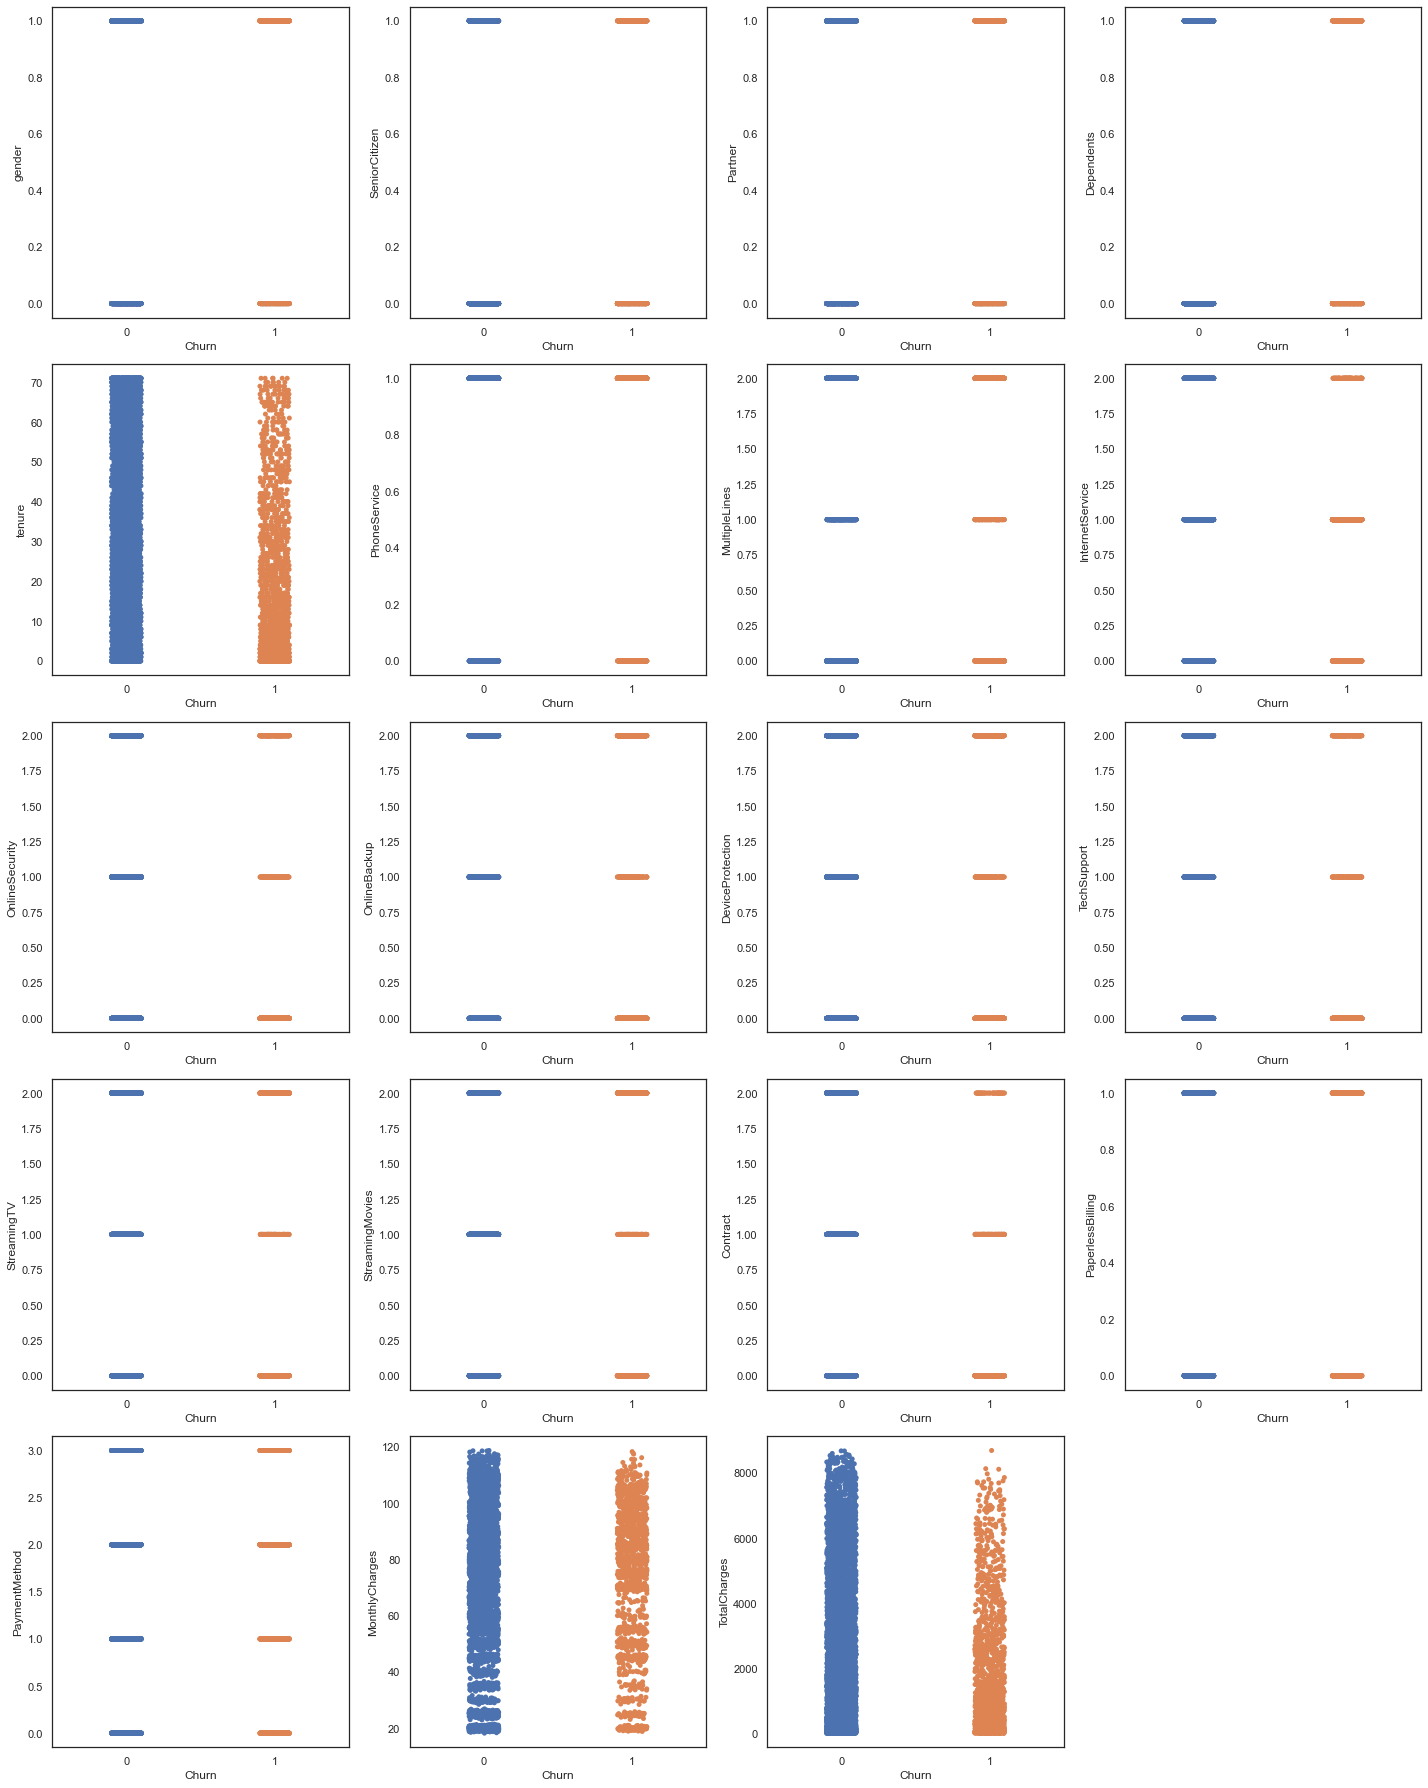

In [26]:
#Lets see how data is distributed for every column
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=20:
        ax =plt.subplot(5,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [ ]:
#Lets check the multicollinearity on dependent variables. Before that we should scale our data.

In [27]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

,vif,Features
0,1.001876,gender
1,1.149648,SeniorCitizen
2,1.461171,Partner
3,1.379721,Dependents
4,7.493654,tenure
5,1.622695,PhoneService
6,1.395898,MultipleLines
7,1.824359,InternetService
8,1.268758,OnlineSecurity
9,1.219068,OnlineBackup


In [ ]:
#all vif values are less than 10. So there is no multicollinearity

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=355)

In [30]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Lets see how well our model performs on the test dataset

In [31]:
y_pred = log_reg.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8083048919226393

# Confusion matrix

In [33]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1183,  117],
       [ 220,  238]], dtype=int64)

In [34]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [35]:
Accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.8083048919226393

In [36]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.91

In [37]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8431931575196009

In [38]:
#F1 score
F1_score = 2*(Recall*Precision)/(Recall+Precision)
F1_score

0.8753237143914169

In [39]:
#Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7148253275109171

# KNN model

In [40]:
#Lets fit the data into Knn model and see how well it performs
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(x_test)

In [42]:
knn.score(x_train,y_train)

0.8333333333333334

In [43]:
print("The accuracy score is : ",accuracy_score(y_test,y_pred))

The accuracy score is :  0.7599544937428896


In [ ]:
#lets try to increase accuracy by using hyperparameter tuning

In [44]:
param_grid = {'algorithm' : ['ball_tree','kd_tree','brute'],
              'leaf_size' : [18,20,25,27,30,32,34],
              'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [45]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [46]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.735, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.748, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.732, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.702, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.750, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.738, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.738, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.752, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.714, total= 

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:  3.8min finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [47]:
#Lets see the best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 34, 'n_neighbors': 12}

In [48]:
#we will use these parameters in our knn algorithm and check if accuracy is increasing
knn = KNeighborsClassifier(algorithm = 'ball_tree',leaf_size = 34, n_neighbors = 12)

In [49]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=34, n_neighbors=12)

In [50]:
knn.score(x_train,y_train)

0.8056503602578687

In [51]:
knn.score(x_test,y_test)

0.7764505119453925

# The test score has increased after hyper para mete tuning

# Random forest model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rand_clf = RandomForestClassifier(random_state=41)

In [54]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=41)

In [55]:
rand_clf.score(x_test,y_test)

0.800910125142207

In [ ]:
#hyper parameter tuning to improve the score

In [56]:
grid_param = {'n_estimators' : [90,100,115,130],
              'criterion' : ['gini','entropy'],
              'min_samples_leaf' : range(1,10,1),
              'min_samples_split' : range(2,10,1),
              'max_features' : ['auto','log2']
              }

In [57]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose = 3)

In [58]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 34.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=41), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [59]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 130}

In [60]:
rand_clf = RandomForestClassifier(criterion='entropy',
                                 max_features = 'auto',
                                 min_samples_leaf= 6,
                                 min_samples_split=2,
                                 n_estimators= 130, random_state=41)

In [61]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=6,
                       n_estimators=130, random_state=41)

In [62]:
rand_clf.score(x_test,y_test)

0.8060295790671217

In [ ]:
# The score has increased after hyper paramete tuning.

# So the best model we have built is of random forest after hyper parameter tuning

In [63]:
import pickle
Customer_Churn_Analysis = 'finalized_model.pickle'
pickle.dump(rand_clf,open(Customer_Churn_Analysis,'wb'))

# Saved the model